# Coursework 1 Group (11)



Group number: 11

Individual project student name and K number:

Shashwat Chandwadkar K2457766







# Load modules (code)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import label_binarize
from sklearn.metrics import balanced_accuracy_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve
from scipy.stats import uniform, loguniform


# Load data (code)

In [2]:
# Load the digits dataset
digits = load_digits()
x, y = digits.data, digits.target

# Split the data into training and testing sets (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Apply preprocessing (StandardScaler)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (1437, 64)
Testing data shape: (360, 64)
Training labels shape: (1437,)
Testing labels shape: (360,)


# Classification

In [3]:
# Initialize Classification techniques
svmD = SVC(random_state=7, probability=True)  # Default SVM
lrD = LogisticRegression(random_state=7, max_iter=1000)  # Default Logistic Regression

## Classification methods used (text)

classification methods used :


1.   Support Vector Machine (SVM)
2.   Logistic Regression



## Training (code)

In [5]:
# Did Hyper parameter tuning for SVM(RandomizedSearchCV) and Logistic Regression(GridSearchCV) but it was not needed
# as the accuracy was already high 99.44 % for SVM , 96.39 % for Logistic regression, after hyperparameter tuning the
# accuracy actually reduced for SVM(99.44 to 98.44) and for Logistic regression it remained the same.
# Initialize RandomSearchCV GridSearchCV for hyperparameter tuning
#svm_dist = {
   # 'C': loguniform(1e-3, 1e3),  # Wider range for C
   #'kernel': ['linear', 'rbf', 'poly'],  # Kernel options
    #'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50)),  # Wider range for gamma
    #'degree': [2, 3, 4]  # Degree for polynomial kernel
#}

#svmH = RandomizedSearchCV(
 #   estimator=SVC(random_state=7, probability=True),
#   param_distributions=svm_dist,
#    n_iter=100,  # Increase the number of iterations
 #   cv=5,  # Use 5-fold cross-validation
  #  scoring='accuracy',  # Use accuracy as the scoring metric
  #  random_state=7,
   # n_jobs=-1
#)

#lrGrid = {
 #   'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Wider range for C
  #  'solver': ['liblinear', 'lbfgs', 'sag', 'saga']  # Additional solvers
#}

#lrH = GridSearchCV(
 #   LogisticRegression(random_state=7, max_iter=1000),
  #  param_grid=lrGrid,
   # cv=5,  # Use 5-fold cross-validation
   # scoring='accuracy'  # Use accuracy as the scoring metric
#)
# the result
#SVM Default - Accuracy: 99.44%, ROC AUC: 99.99%
#SVM Optimized - Accuracy: 98.44%, ROC AUC: 99.98%
#Logistic Regression Default - Accuracy: 96.39%, ROC AUC: 99.88%
#Logistic Regression Optimized - Accuracy: 96.39%, ROC AUC: 99.88%



# Training
# Train the default models


svmD.fit(x_train, y_train)
lrD.fit(x_train, y_train)



LogisticRegression(max_iter=1000, random_state=7)

## Evaluation (code)

SVM Default - Accuracy: 99.44%, ROC AUC: 99.99%
Logistic Regression Default - Accuracy: 96.39%, ROC AUC: 99.88%


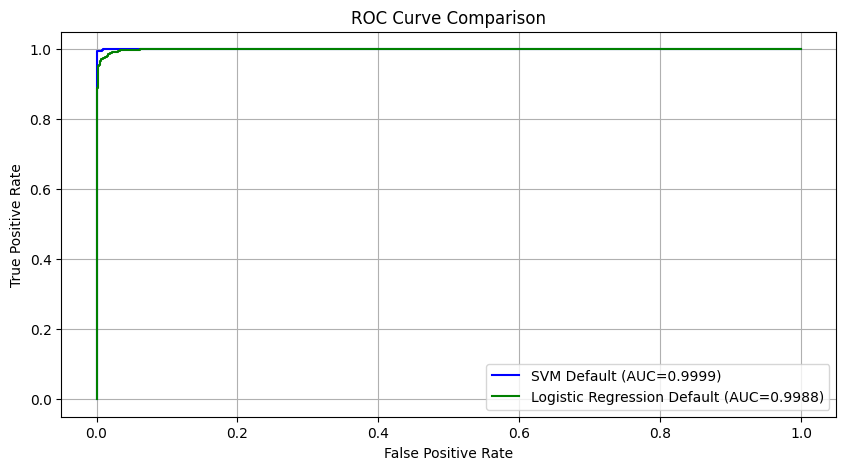

In [6]:
# Evaluation (code)

# Function to evaluate models
def comparison_evaluation(model, x_test, y_test, y_test_bin):
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)
    bacc = balanced_accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(label_binarize(y_test, classes=np.unique(y_test)), y_score, multi_class='ovr')
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    return bacc, roc_auc, y_pred, y_score, accuracy

# Evaluate the models
svmD_bacc, svmD_roc_auc, svmD_y_pred, svmD_y_score, svmD_accuracy = comparison_evaluation(svmD, x_test, y_test, y_test_bin)
lrD_bacc, lrD_roc_auc, lrD_y_pred, lrD_y_score, lrD_accuracy = comparison_evaluation(lrD, x_test, y_test, y_test_bin)

# Print accuracy and ROC AUC in percentage format
print("SVM Default - Accuracy: {:.2f}%, ROC AUC: {:.2f}%".format(svmD_accuracy * 100, svmD_roc_auc * 100))
print("Logistic Regression Default - Accuracy: {:.2f}%, ROC AUC: {:.2f}%".format(lrD_accuracy * 100, lrD_roc_auc * 100))

# Plotting ROC curves
plt.figure(figsize=(10, 5))

# ROC curves for Default models
fpr_svmD, tpr_svmD, _ = roc_curve(y_test_bin.ravel(), svmD_y_score.ravel())
fpr_lrD, tpr_lrD, _ = roc_curve(y_test_bin.ravel(), lrD_y_score.ravel())

# Plotting ROC curves with AUC values annotated
plt.plot(fpr_svmD, tpr_svmD, label=f"SVM Default (AUC={svmD_roc_auc:.4f})", color="blue")
plt.plot(fpr_lrD, tpr_lrD, label=f"Logistic Regression Default (AUC={lrD_roc_auc:.4f})", color="green")

# Add labels, title, and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.grid()
plt.show()

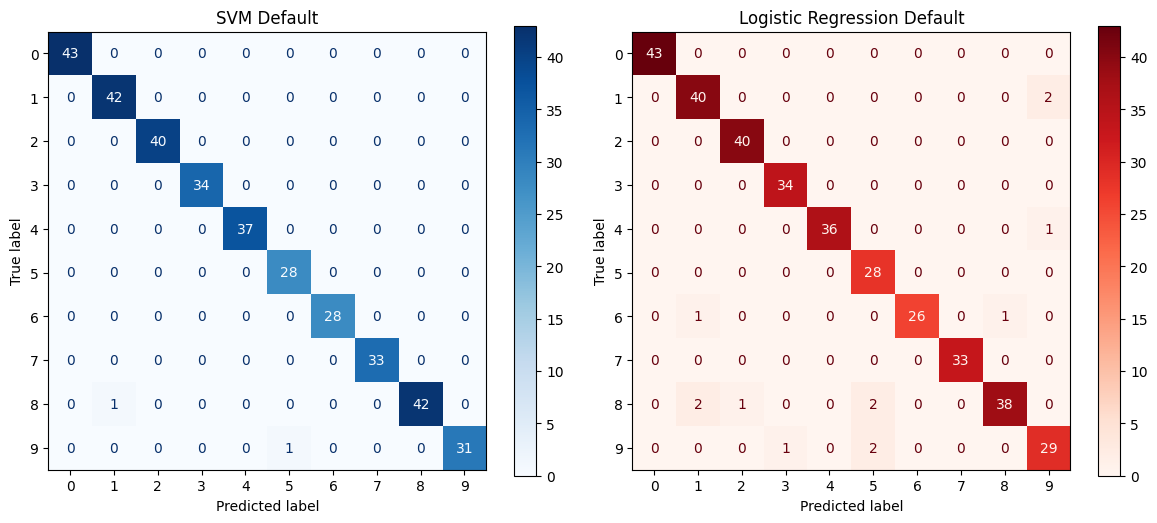

In [7]:
# Plotting confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

cm_svmD = confusion_matrix(y_test, svmD_y_pred)
cm_lrD = confusion_matrix(y_test, lrD_y_pred)

ConfusionMatrixDisplay(cm_svmD, display_labels=np.unique(y_test)).plot(ax=axes[0], cmap='Blues')
axes[0].set_title("SVM Default")

ConfusionMatrixDisplay(cm_lrD, display_labels=np.unique(y_test)).plot(ax=axes[1], cmap='Reds')
axes[1].set_title("Logistic Regression Default")

plt.tight_layout()
plt.show()

# References (text)

Scikit-Learn. (n.d.). sklearn.datasets.load_digits — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.model_selection.train_test_split — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.linear_model.LogisticRegression — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.svm.SVC — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.model_selection.GridSearchCV — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.accuracy_score — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.confusion_matrix — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.classification_report — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.roc_curve — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html [Accessed 28 February 2025].

Scikit-Learn. (n.d.). sklearn.metrics.auc — scikit-learn documentation. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html [Accessed 28 February 2025]

DeepSeek. (2023). DeepSeek (Version 3) [Large language model]. Used for debugging, fixing errors, and correcting syntax in code. Available at: https://www.deepseek.com [Accessed 28 February 2025].